In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<18:21:00> Checking library dependencies ...
<18:21:00> Using the following libraries (in addition to the Anaconda libraries):
<18:21:00> 	scipy (v0.18.0)
<18:21:00> 	statsmodels (v0.6.1)
<18:21:00> 	scikit-learn (v0.17.1)
<18:21:00> 	seaborn (v0.7.1)
<18:21:00> 	rpy2 (v2.8.2)
<18:21:00> 	pandas (v0.18.1)
<18:21:00> 	matplotlib (v1.5.1)
<18:21:00> 	numpy (v1.11.1)
<18:21:00> Planted a random seed 20121020.


# Define states

In [2]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
ks = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
n_clusterings = 10
filepath_prefix = 'output/ccle_hema_k_9_H_{}clustering'.format(n_clusterings)
# labels, memberships, cophenetic_correlation = ccal.analyze.define_states(h, ks, n_clusterings=n_clusterings,
#                                                                              filepath_prefix=filepath_prefix)

# Make Onco-GPS

In [3]:
labels = pd.read_csv(filepath_prefix + '_labels.txt', index_col=0, sep='\t')
memberships = ccal.support.read_gct(filepath_prefix + '_memberships.gct')
annotations = ccal.support.make_random_features(1, memberships.shape[1])

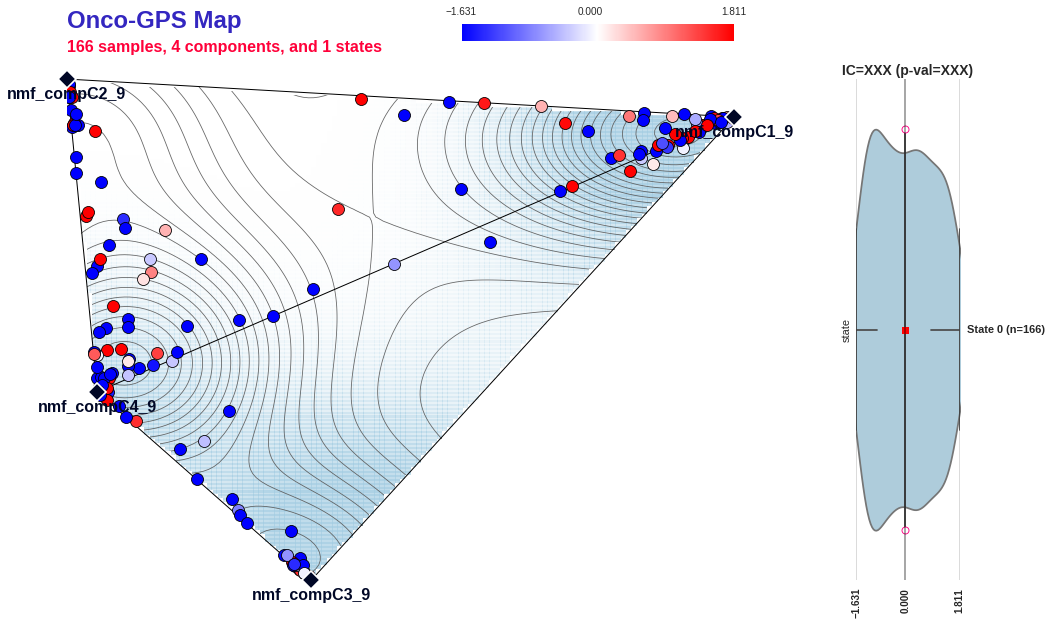

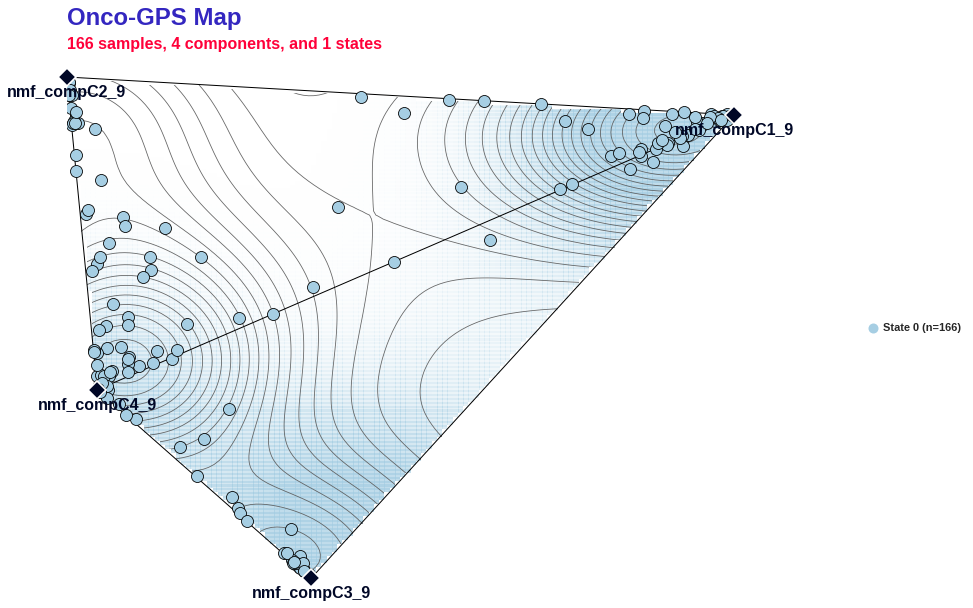

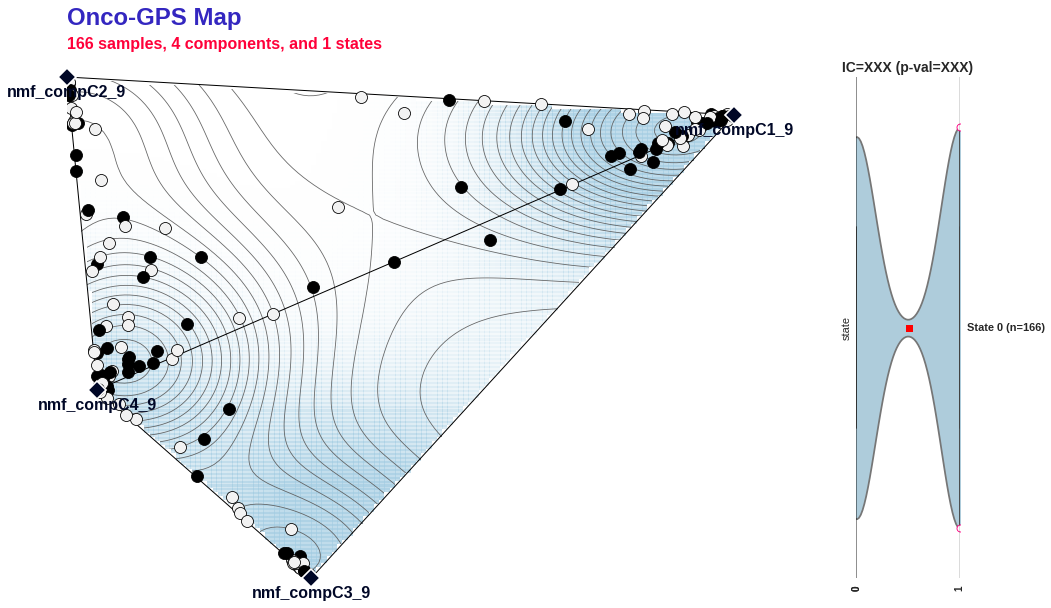

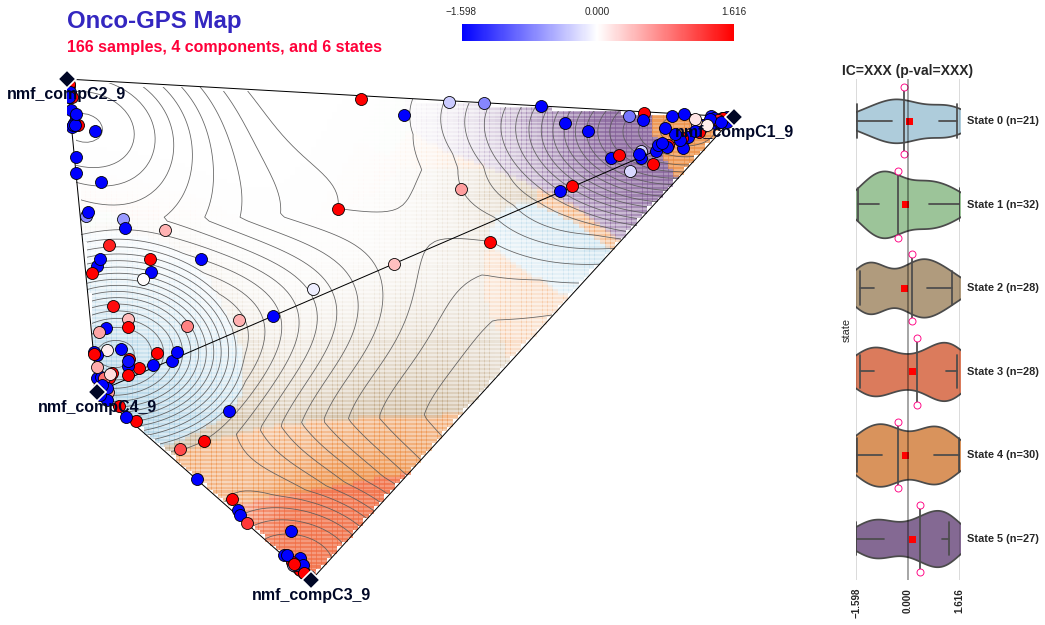

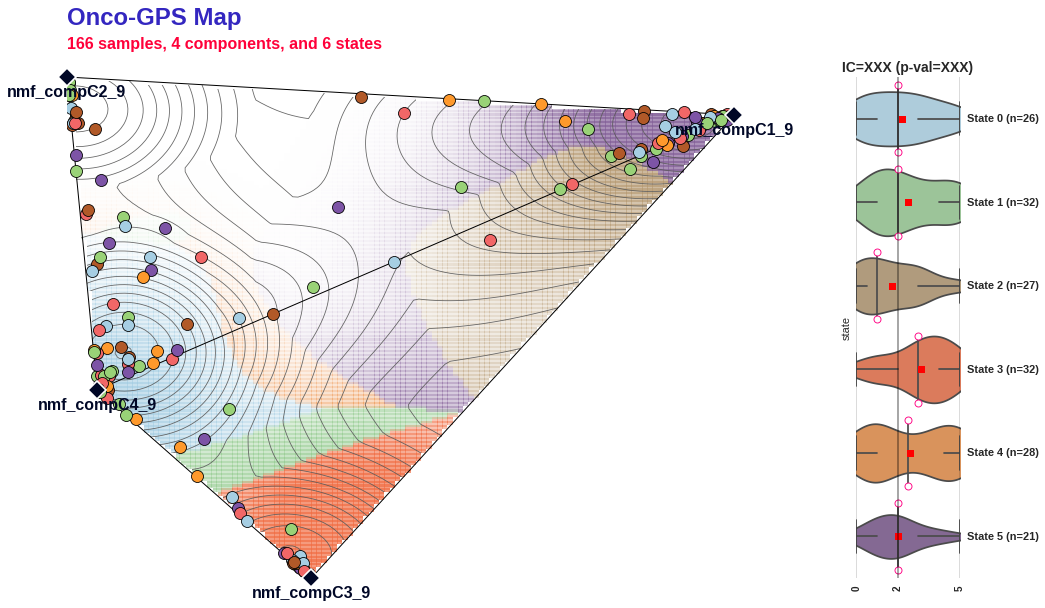

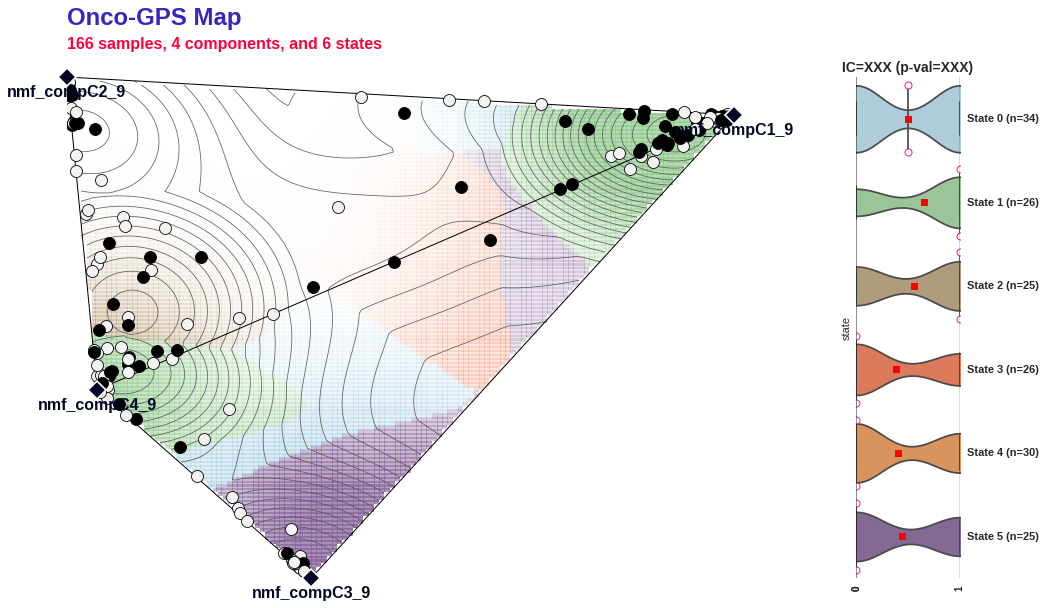

KeyboardInterrupt: 

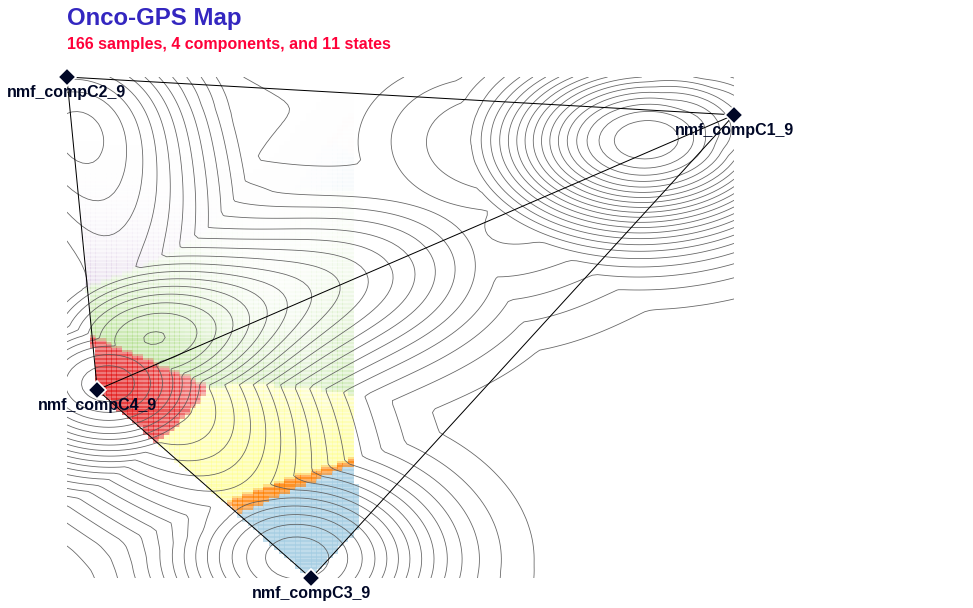

In [4]:
ccal.support.VERBOSE = False

for n_components in [4, 5, 6, 7, 8, 9, 10, 11, 12]:
    #h = ccal.support.make_random_features(n_components, 100)
    h = h.iloc[:n_components, :]
    for n_state in range(1, 21, 5):
        for annotation_type in ['continuous', 'categorical', 'binary']:
            if annotation_type == 'continuous':
                annotations = np.random.random_sample(h.shape[1])
            elif annotation_type == 'categorical':
                annotations = np.random.choice(range(n_state), h.shape[1])
            elif annotation_type == 'binary':
                annotations = np.random.choice(range(2), h.shape[1])
            else:
                raise ValueError('Error in annotation_type.')
            ccal.onco_gps.make_map(h,
                                   np.random.choice(list(range(n_state)), h.shape[1]),
                                   annotations=annotations,
                                   annotation_type=annotation_type)#,
                                   #background_markersize=0, background_mask_markersize=0)

# Project samples

In [5]:
# TODO